## ORIGINALLY CREATED BY HARI 23/02/2024 20:28 PM


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction

/content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from collections import Counter
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


In [5]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [6]:
# Load datasets from csv files
dataset = pd.read_csv('Product_Exclusive_Classification.csv')

## Describe Data

In [37]:
def extract_dataset_info(dataset):
    info = {}
    num_features = len(dataset.columns)
    info['Jumlah_Fitur'] = num_features
    features_info = []
    for column in dataset.columns:
        feature_info = {}
        feature_info['feature_name'] = column
        feature_info['total_row'] = len(dataset[column])
        feature_info['missing_val'] = dataset[column].isnull().sum()
        feature_info['has_missing_value'] = True if dataset[column].isnull().sum() > 0 else False
        feature_info['percentage_missing_value'] = (dataset[column].isnull().sum()/len(dataset[column]))*100 if dataset[column].isnull().sum() > 0 else 0
        feature_info['is_numeric'] = pd.api.types.is_numeric_dtype(dataset[column])
        feature_info['is_object'] = pd.api.types.is_object_dtype(dataset[column]),
        feature_info['value_count'] = dataset[column].value_counts() if pd.api.types.is_object_dtype(dataset[column]) else '',
        feature_info['unique'] = dataset[column].unique() if pd.api.types.is_object_dtype(dataset[column]) else ''
        features_info.append(feature_info)
    info['information'] = features_info
    return info

def detect_distribution(dataset):
    distribution_info = {}
    for column in dataset.columns:
        values = dataset[column].dropna()
        skewness = skew(values)
        kurt = kurtosis(values)
        if skewness > 0:
            distribution = 'Positive'
        elif skewness < 0:
            distribution = 'Negative'
        else:
            if kurt > 0:
                distribution = 'Bimodal'
            else:
                distribution = 'Unknown'

        distribution_info[column] = {
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Distribution': distribution
        }

    return distribution_info

def detect_outliers(dataset, threshold=1.5):
    """
    Function to detect outliers in each feature of a dataset using the IQR method.

    Args:
    - dataset: Pandas DataFrame, the dataset to be analyzed.
    - threshold: float, threshold value to determine outliers (default is 1.5).

    Returns:
    - outlier_info: Dictionary, containing information about outliers in each feature.
    """
    outlier_info = {}

    for column in dataset.columns:
        values = dataset[column].dropna()  # Drop missing values

        # Calculate quartiles
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Find outliers
        outliers = values[(values < lower_bound) | (values > upper_bound)]

        # Store information about outliers in the feature
        outlier_info[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers.tolist()
        }

    return outlier_info

In [7]:
#describe information about dataset
dataset_info = extract_dataset_info(dataset) # helper to make life more easier!
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [8]:
# Memisahkan kolom
object_column     = [d for d in dataset_info['information'] if d.get('is_object') == (True,)]
numeric_column    = [d for d in dataset_info['information'] if d['is_numeric']]
has_missing_value = [d for d in dataset_info['information'] if d['has_missing_value']]

In [44]:
[b['feature_name'] for b in numeric_column]

['id',
 'rating',
 'number_of_reviews',
 'love',
 'price',
 'value_price',
 'exclusive']

In [39]:
# Inforamsi Feature dengan Data Outliers
df = dataset[[b['feature_name'] for b in numeric_column]]
outlier_info = detect_outliers(df)

# Print information about outliers
for feature, info in outlier_info.items():
    print(f"Feature: {feature}")
    print(f"Lower Bound: {info['Lower Bound']}")
    print(f"Upper Bound: {info['Upper Bound']}")
    print(f"Outliers: {info['Outliers']}")
    print()


Feature: id
Lower Bound: 1155836.5
Upper Bound: 2802616.5
Outliers: [50, 304, 404, 443, 463, 6528, 7393, 7740, 11023, 12104, 12450, 12658, 13383, 43620, 43687, 47191, 47860, 47936, 48041, 48074, 48579, 49890, 50492, 50534, 50765, 50823, 50997, 51029, 51052, 51078, 51532, 51573, 51904, 52852, 54312, 55780, 70680, 71571, 74476, 74609, 74773, 75002, 75663, 77776, 77891, 78659, 82685, 83246, 83295, 83360, 83410, 86777, 87312, 101220, 108779, 112680, 112706, 126581, 133751, 135558, 136952, 137471, 150714, 150938, 153726, 193839, 203448, 241539, 241653, 260885, 273433, 288092, 336545, 346494, 348078, 348128, 348144, 348946, 351841, 352054, 353508, 365049, 373894, 388512, 397299, 397307, 407304, 410712, 420570, 445478, 446609, 455774, 455774, 463042, 463398, 464834, 465682, 465690, 472597, 472845, 487694, 498824, 500025, 502443, 502641, 504274, 513168, 513234, 534529, 534628, 549170, 556076, 562082, 562090, 563338, 564260, 564286, 564294, 564369, 571257, 571265, 579490, 590927, 592501, 592527

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

In [9]:
dataset.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [10]:
#Describe Value Counting Feature Tipe Kategorikal
dataset[[b['feature_name'] for b in object_column]].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


Terlihat bahwa ada total 310 merek yang berbeda dan 142 kategori produk yang berbeda dalam dataset. Merk yang paling sering muncul adalah "SEPHORA COLLECTION" dengan 492 data, sementara kategori produk yang paling umum adalah "Perfume" dengan 619 data. Analisis ini memberikan gambaran tentang distribusi merek dan kategori produk dalam dataset, serta memberikan gambaran awal tentang tren atau preferensi konsumen yang mungkin tercermin dalam data tersebut.

In [11]:
# Jumlah Unique Value Dari Kolom Kategorikal
for i in object_column:
  print("Value Counts for : ", i['feature_name'])
  print(i['value_count'])
  print("======================")

Value Counts for :  brand
(SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: brand, Length: 310, dtype: int64,)
Value Counts for :  category
(Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: category, Length: 142, dtype: int64,)


In [12]:
# Jumlah Nilai Unik Dari Kolom Kategorikal
for i in object_column:
  print("Value Unique for : ", i['feature_name'])
  print(i['unique'])
  print("======================")

Value Unique for :  brand
['SEPHORA COLLECTION' 'Givenchy' 'BVLGARI' 'Yves Saint Laurent'
 'Carolina Herrera' 'Estée Lauder' 'Guerlain' 'DOLCE&GABBANA' 'CHANEL'
 'CLINIQUE' 'Clarins' 'Calvin Klein' 'Dior' 'Donna Karan' 'HERMÈS'
 'Shiseido' 'Benefit Cosmetics' 'Evian' 'Lancôme' 'Ralph Lauren' 'Mugler'
 'Caudalie' 'Gucci' 'philosophy' 'stila' 'Peter Thomas Roth'
 'Armani Beauty' 'Fresh' 'Kenzo' 'Michael Kors' 'BURBERRY' 'Jack Black'
 "L'Occitane" 'Marc Jacobs Fragrances' 'Murad' 'Rosebud Perfume Co.'
 'Blinc' 'Pink Sugar' 'bareMinerals' 'Anastasia Beverly Hills'
 'John Varvatos' 'Deborah Lippmann' 'Prada' 'NARS' 'tarte' 'Laura Mercier'
 'Narciso Rodriguez' 'MAKE UP FOR EVER' 'Lab Series For Men' 'Versace'
 'TOCCA' 'Juicy Couture' 'Acqua Di Parma' 'Buxom' 'REN Clean Skincare'
 'TOM FORD' 'Hourglass' 'KEVYN AUCOIN' 'Klorane' 'Josie Maran'
 'The Art of Shaving' 'TWEEZERMAN' 'Perricone MD' 'Dr. Brandt Skincare'
 'AMOREPACIFIC' 'Kate Somerville' 'Shaveworks' 'CLEAN RESERVE'
 'Paco Rabanne' 'L

## Pendekatan Grafis

### Univariate Analysis (20 Poin)

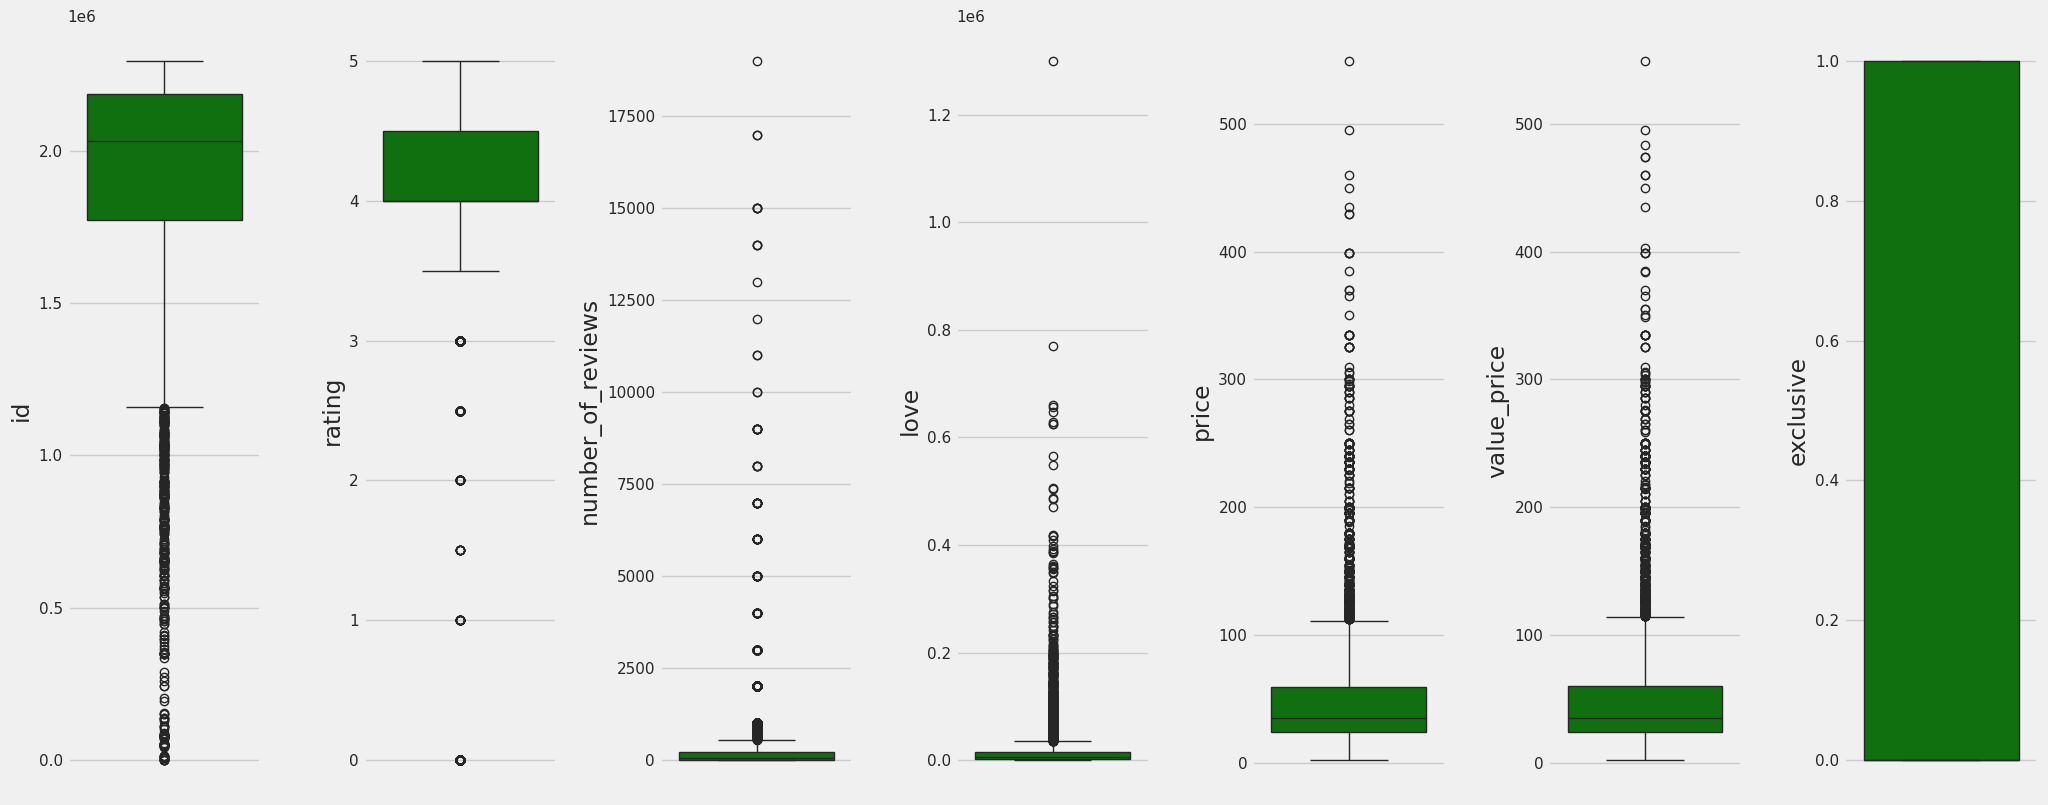

In [13]:
#Individuals Boxplot
features = [b['feature_name'] for b in numeric_column]
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y= dataset[features[i]], color='green', orient='v')
  plt.tight_layout()


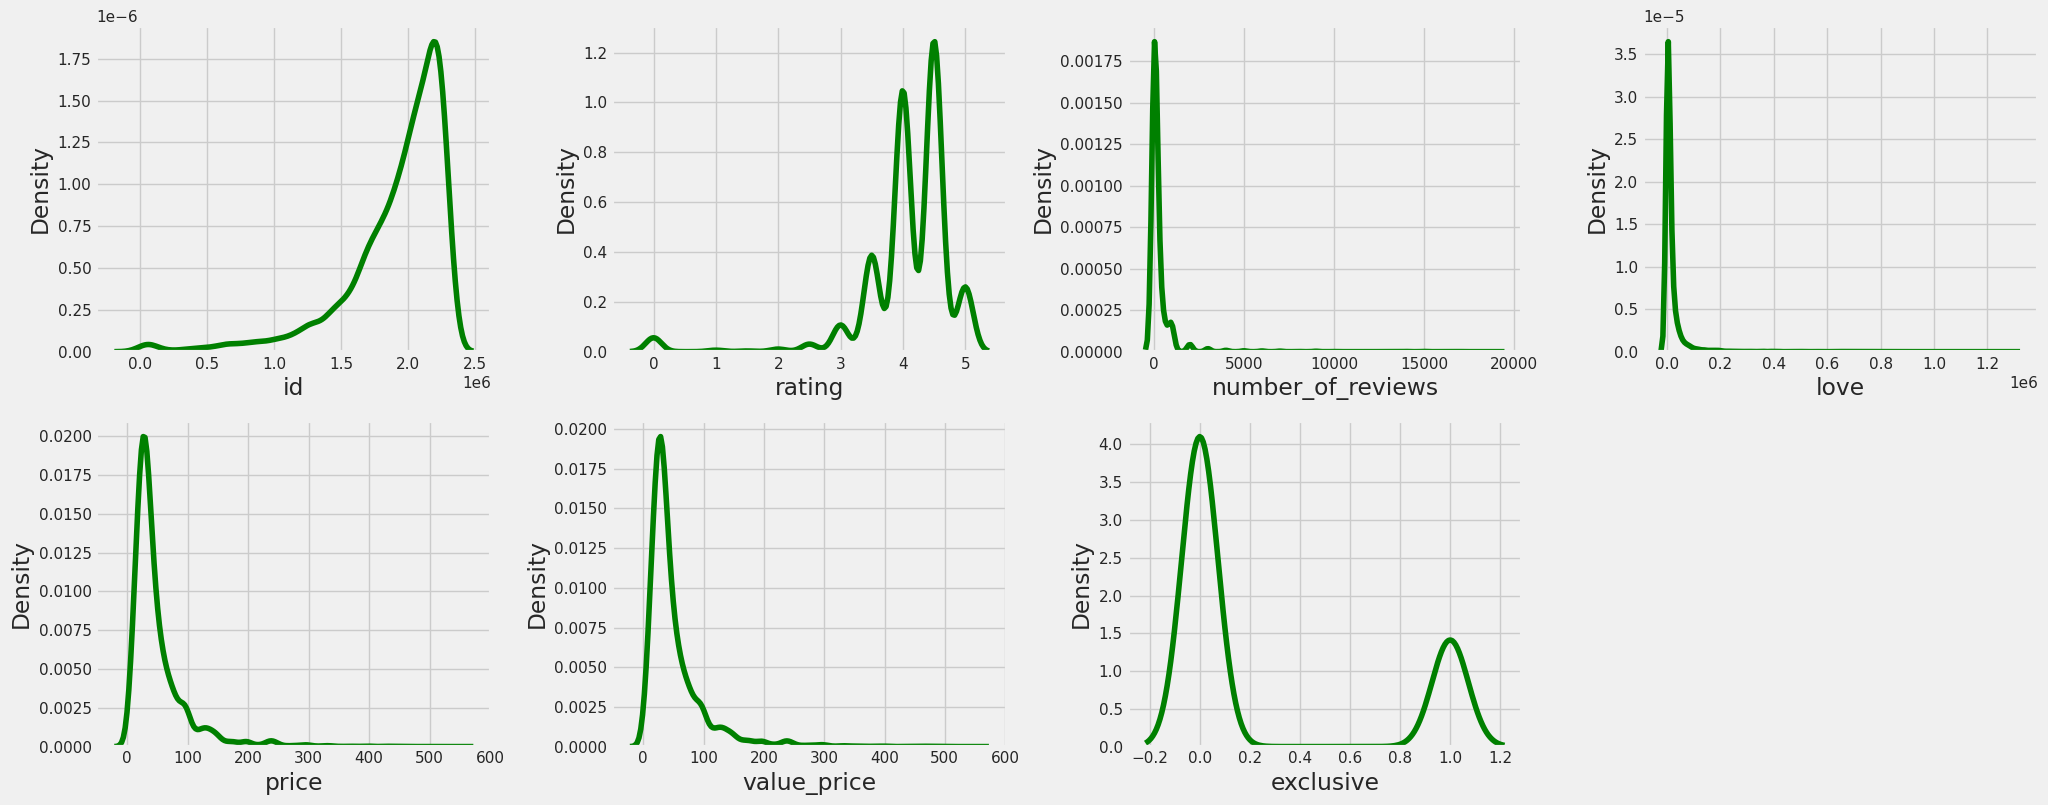

In [24]:
features = [b['feature_name'] for b in numeric_column]
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) # 2x4=8> len(numericals)=7
    sns.kdeplot(x=dataset[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [22]:
# Detect distribution of features
distribution_info = detect_distribution(dataset[[b['feature_name'] for b in numeric_column]])
# Print distribution information
for feature, info in distribution_info.items():
    print(f"Feature: {feature}")
    print(f"Skewness: {info['Skewness']}")
    print(f"Kurtosis: {info['Kurtosis']}")
    print(f"Distribution: {info['Distribution']}")
    print()

Feature: id
Skewness: -2.0320751850212235
Kurtosis: 5.253424622900038
Distribution: Negative

Feature: rating
Skewness: -3.0025433962477237
Kurtosis: 13.09143119932202
Distribution: Negative

Feature: number_of_reviews
Skewness: 9.504789594452573
Kurtosis: 124.67216874551914
Distribution: Positive

Feature: love
Skewness: 9.50980382667816
Kurtosis: 155.23715152391895
Distribution: Positive

Feature: price
Skewness: 3.1450533111771275
Kurtosis: 14.63055171885497
Distribution: Positive

Feature: value_price
Skewness: 3.171090905166252
Kurtosis: 14.965146692223534
Distribution: Positive

Feature: exclusive
Skewness: 1.1189363337319722
Kurtosis: -0.7479814810544516
Distribution: Positive



Deskripsi dengan pendekatan deskriptif dan grafis

### Multivariate Analysis (10 Poin)

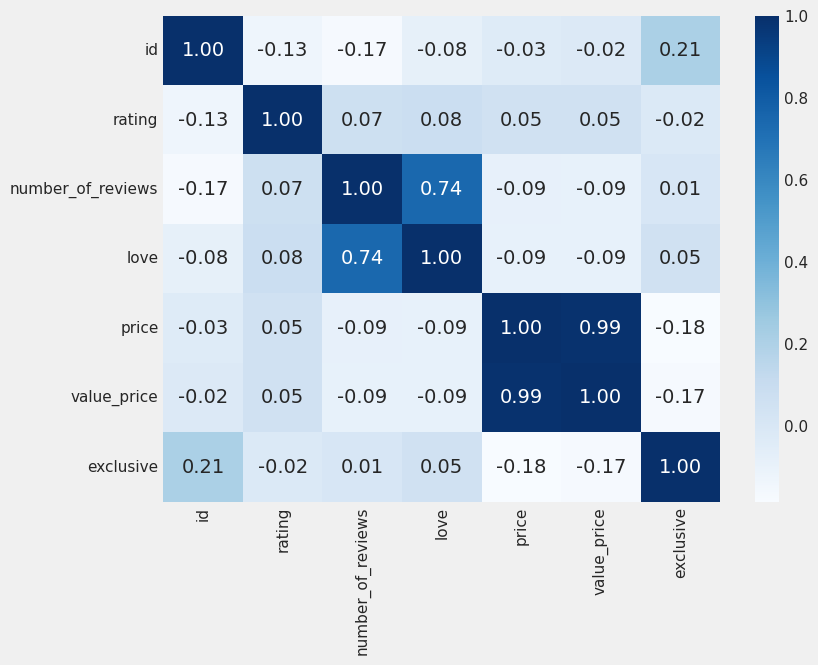

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), cmap="Blues", annot=True, fmt='.2f')
plt.show()

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

# Data Preparation

## Missing Value (5 Poin)

## Duplicate Values (5 Poin)


## Outliers (5 Poin)

## Normalization/Standardization (5 Poin)


## Feature encoding (5 Poin)

## Class imbalance (5 Poin)

# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?